<a href="https://colab.research.google.com/github/LikhanBiswas/CNN-Models/blob/main/model_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install extra-keras-metrics
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf
from tensorflow.keras import regularizers
from glob import glob
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
import extra_keras_metrics as ekm
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC, BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from keras.models import load_model

from keras.models import Sequential

  Created wheel for extra-keras-metrics: filename=extra_keras_metrics-2.0.1-py3-none-any.whl size=13970 sha256=6e46243f0dbcd04605aa9e8d62457be2893d79a1aaf33bb1ad73b7a1c515934a
  Stored in directory: /root/.cache/pip/wheels/52/de/56/ea1d10e8eaf78da501de7070181fc200ec4af3993b17d9b627
Successfully built extra-keras-metrics


In [3]:
from google.colab import drive
drive.mount('/content/drive')
train_path = '/content/drive/MyDrive/real vs fake/NEW_TRAIN_10K'
valid_path = '/content/drive/MyDrive/real vs fake/test'

Mounted at /content/drive


In [4]:
IMAGE_SIZE = [256, 256]

In [5]:
batch_dim = -1

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=IMAGE_SIZE + [3], bias_regularizer=tf.keras.regularizers.l1(l1=0.00001), activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),   bias_regularizer=tf.keras.regularizers.l1(l1=0.00001), activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),  bias_regularizer=tf.keras.regularizers.l1(l1=0.00001), activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),   bias_regularizer=tf.keras.regularizers.l1(l1=0.00001), activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),   bias_regularizer=tf.keras.regularizers.l1(l1=0.00001), activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(axis=batch_dim))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
#model.add(Dropout(0.1))

model.add(Dense(1))
model.add(Activation(activation='sigmoid'))


# view the structure of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)      

In [8]:
callbacks = [
    # EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    
] 

In [9]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics='accuracy'
  )


In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=90,
                                   width_shift_range=0.3,
                                   #fill_mode='wrap',
                                   height_shift_range=0.3,
                                   #channel_shift_range=150.0,
                                   brightness_range=(0.1, 0.5),
                                   vertical_flip=True,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [12]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/real vs fake/NEW_TRAIN_10K',
                                                 target_size = (256, 256),
                                                 batch_size = 20,
                                                 color_mode='rgb',
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/real vs fake/test',
                                            target_size = (256, 256),
                                            batch_size = 20,
                                            color_mode='rgb',
                                            class_mode = 'binary')

Found 10000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [13]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  verbose=1,
  callbacks=callbacks
)


Epoch 1/20
500/500 [==============================] - 2962s 6s/step - loss: 0.2443 - accuracy: 0.9011 - val_loss: 0.2532 - val_accuracy: 0.8887
Epoch 2/20
500/500 [==============================] - 233s 467ms/step - loss: 0.1022 - accuracy: 0.9632 - val_loss: 0.0775 - val_accuracy: 0.9673
Epoch 3/20
500/500 [==============================] - 245s 489ms/step - loss: 0.0695 - accuracy: 0.9753 - val_loss: 0.1817 - val_accuracy: 0.9507
Epoch 4/20
500/500 [==============================] - 244s 488ms/step - loss: 0.0518 - accuracy: 0.9809 - val_loss: 0.8183 - val_accuracy: 0.8150
Epoch 5/20
500/500 [==============================] - 245s 490ms/step - loss: 0.0615 - accuracy: 0.9791 - val_loss: 0.1452 - val_accuracy: 0.9660
Epoch 6/20
500/500 [==============================] - 246s 491ms/step - loss: 0.0438 - accuracy: 0.9848 - val_loss: 0.0596 - val_accuracy: 0.9873
Epoch 7/20
500/500 [==============================] - 217s 433ms/step - loss: 0.0400 - accuracy: 0.9873 - val_loss: 0.0720 - v

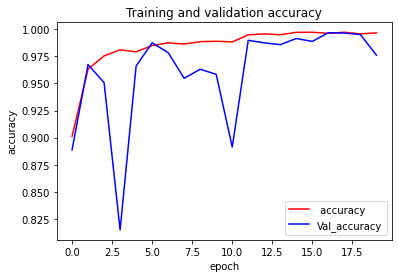

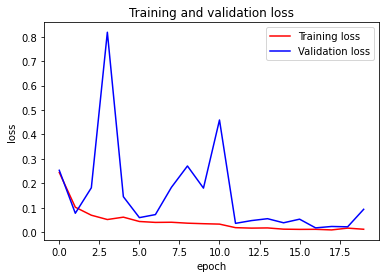

In [17]:
from matplotlib import pyplot
#Graphing our training and validation
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs = range(len(acc))
from matplotlib import pyplot
plt.plot(epochs, acc, 'r', label=' accuracy')
plt.plot(epochs, val_acc, 'b', label='Val_accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()